# Shallow Neural Network in Keras

Build a shallow neural network to classify MNIST digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb)

#### Load dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

Using TensorFlow backend.


#### Load data

Results show that there are 60,000 labels indiating what digit each of the 60,000 training images contains.

Load the MNIST data where X represent the data we're feeding into the model and y is used for the labelled ouput that we're training the model to predict.
* *Training Labels*: Training labels are the known outputs (or "targets") corresponding to the training data inputs. In supervised learning tasks, such as classification or regression, the training labels represent the ground truth values that the model aims to learn to predict. During the training process, the model adjusts its parameters to minimize the discrepancy between its predictions and the actual training labels.

* *Validation Labels*: Validation labels, on the other hand, are also known outputs, but they are used for evaluating the performance of the trained model during the training process. After training the model using the training dataset, the model's performance is assessed using the validation dataset. The validation labels help assess how well the model generalizes to unseen data and whether it suffers from overfitting (i.e., performing well on the training data but poorly on new data). The validation dataset is typically separate from the training dataset to provide an unbiased estimate of the model's performance.

In [26]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [27]:
X_train.shape

(60000, 28, 28)

Results show that there are 60,000 images in our training data set, each is a 28x28 matrix of values.

In [28]:
y_train.shape

(60000,)

In [29]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

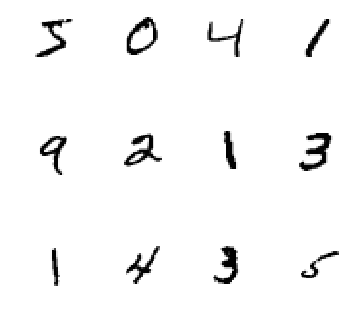

In [30]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

___

Below examines the shape of the validation data

In [31]:
X_valid.shape

(10000, 28, 28)

There are 10,000 28x28 validation images

In [32]:
y_valid.shape

(10000,)

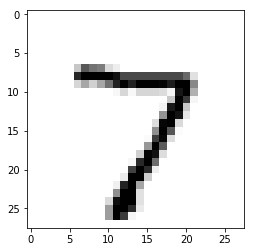

In [33]:
plt.imshow(X_valid[0], cmap='Greys')

In [34]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Results show matrix of integers representing the handingwriting is primarily zero (whitespace). You might make it out that the digit is seven with the higest integers (254, 255) representing the black core of the handwritten figure and the outline of the figure (composed of intermediate integers) fading toward white.

In [35]:
y_valid[0]

7

Label / output is 7 - same as what we thought the output would be!

#### Preprocess data

*Preprocess model inputs X*

We won't be preprocessing the images by apply functions to,say, extract features that provide hints to our artificial neural network. We will simply be rearranging the *shape* of the data so that they match up with the shapes of the input and output layers of the network.

Simultaneoulsy, we will convert the pixel darknesses from integers to single-precision float values, in preparation to divide these values by 255 so that they can range from 0 to 1.

- Single-precision floating-point values("float32" - stored using 32bit/4 bytes of memeory ) refer to a data type used to represent decimal numbers with a limited precision (around 7 decimal digits).

In [36]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [37]:
X_train /= 255
X_valid /= 255

In [38]:
X_valid[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

*Preprocess labels y*

Convert them from integers into *one-hot encodings*.
* One-hot encodings is a method of representing categorical variables as binary vectors (i.e., a vector of 0s and 1s), where each category corresponds to a unique position in the vector. Each instance in the dataset is then represented by one of these binary vectors, where a 1 indicating the presence of a particular category and 0s elsewhere. 
 * Suppose you have a categorical variable "Color" with three unique categories: "Red", "Green", and "Blue".
 * "Red" is encoded as [1, 0, 0]
 * "Green" is encoded as [0, 1, 0]
 * "Blue" is encoded as [0, 0, 1]

There are ten possible digits (0 to 9) so we set `n_classes` = 10.
Next, we use a convenient utility function `to_categorical` (which is provided within the Keras library) to transform both the training and validation labels from integers to the one-hot-format.

In [39]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [40]:
y_valid[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

This output shows how label *Seven* is represented. 

In such one-hot encoding, the label *zero* would be be represented by 1 in the first position, *one* represented by 1 in the second position.

We arrange the labels with such one-hot encoding so that they line up with the 10 probabilities being output by the final layer of our artifical neural network. If the input image is a handwritten *seven* then a perfectly-trainned network would output a probability of 1.00 that it is a seven and a probability of 0.00 for each of the the other nine classes of digits.

#### Design neural network architecture

In architecting the artificial neural net itself, we first:
* Institaite the simplest type of neural-network model, the *sequential* type
* Then, we `add()` the attributes of our one hidden layer
 * which consists of 64 sigmoid-type artificial neurons in the general-purpose, fully-connected arrangement defined by the `Dense()` method) to our *model* object 
 * as well as the shape of our input layer (our reshaped one-dimenstional array of length 28 x 28 =784)
* Last, we specify the output layer and its parameters: 10 artifical neurons of the *softmax* variety correspnding to the ten probability for each of the ten possible digits

* *sigmoid-type* neurons: Takes a real-valued input and squashes it into a range between 0 and 1. 

* *softmax* neurons: Takes a vector of real-valued inputs and squashes them to a probability distribution over multiple classes. It transforms each element of the input vector into a probability between 0 and 1. The sum of all probabilities equals 1, representing a probability distribution over multiple classes.

In [41]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [43]:
(64*784)

50176

In [44]:
(64*784)+64

50240

In [45]:
(10*64)+10

650

#### Configure model

In [47]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

Below is the Keras code to train our shallow neural network:
1. The `fit()` method of our model object enables us to train our artificial neural network with the training images `X_train` as inputs and their associated labels `y_train` as the desired outputs.
2. As the network trains, the `fit()` method also provides us with the option to evaluate the performance of our network by passing our validation data `X_valid` and `y_valid` into the `validation_data` parameter.
3. With machine learning, and especially with deep learning, it is commonplace to train our model on the same data multiple times. One pass through all of our training data (60,000 images in the current case) is called one *epoch* of training. By setting the epochs parameter to 200, we cycle through all 60,000 training images two hundred separate times.
4. By setting `verbose` to 1, `model.fit()` will provide us with plenty of feedback as we train. At the moment, we’ll focus on the `val_acc` statistic output following each epoch of training. *Validation accuracy* is the proportion of the 10,000 handwritten images in `X_valid` where the network’s highest probability in the output layercorresponds to the correct digit as per the labels in `y_valid`.

In [48]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 16s 275us/step - loss: 0.0919 - acc: 0.0515 - val_loss: 0.0915 - val_acc: 0.0657
Epoch 2/200
60000/60000 [==============================] - 16s 259us/step - loss: 0.0912 - acc: 0.0747 - val_loss: 0.0909 - val_acc: 0.0894
Epoch 3/200
 6272/60000 [==>...........................] - ETA: 13s - loss: 0.0909 - acc: 0.0917

KeyboardInterrupt: 

Following the first epoch of training, we observe val_acc: 0.1010. 
* That is, 10.1% of the images from the held­out validation dataset were correctly classified by our shallow architecture. Given that there are ten classes of handwritten digits, we’d expect a random process to guess ten percent of the digits correctly by chance, so this is not an impressive result. 
* As the network continues to train, however, the results improve. After ten epochs of training, it is correctly classifying 36.5% of the validation images— far better than would be expected by chance! And this is only the beginning: 
* After 200 epochs, the network’s improvements appears to be plateauing as it approaches 86% validation accuracy.

In [24]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 11us/step


[0.02861827013194561, 0.856]